In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
print(' Step 1: \n importing data')
data = pd.read_csv(r'C:\Users\pv437\Desktop\Data Scince Folder\assignment\assignment downloads\ass7\crime_data.csv')
data.head()

 Step 1: 
 importing data


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data.rename({'Unnamed: 0': 'Name'}, axis=1,inplace=True)

In [5]:
data['Name']=data['Name'].astype('category') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      50 non-null     category
 1   Murder    50 non-null     float64 
 2   Assault   50 non-null     int64   
 3   UrbanPop  50 non-null     int64   
 4   Rape      50 non-null     float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 4.2 KB


In [6]:
data[data.duplicated()].shape  

(0, 5)

 Step 2:- 
 Outlier detection


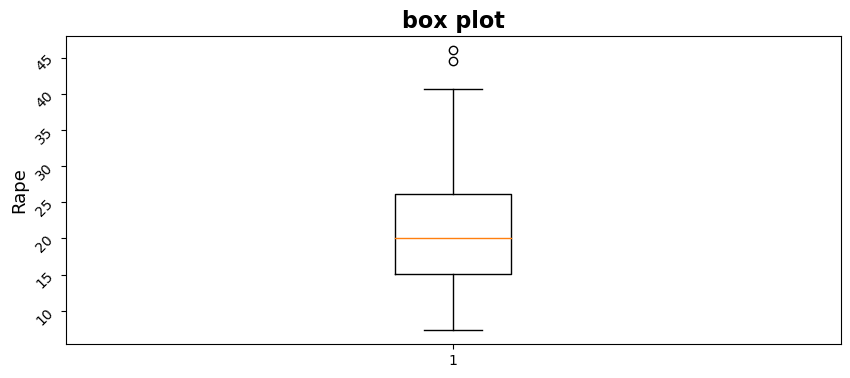

In [8]:
print(' Step 2:- \n Outlier detection')
plt.figure(figsize=(10,4))                   
plt.title("box plot", fontsize = 16, fontweight = "bold")                    
plt.ylabel("Rape", fontsize = 13 )                                           
plt.yticks( rotation = 45, fontsize = 10)                                    
plt.boxplot(x='Rape', data=data)           
plt.show()                         

In [9]:
print(np.where(data['Rape']>42))

(array([ 1, 27], dtype=int64),)


In [10]:
data['Rape'][1] = 21
data['Rape'][27] = 26

In [12]:
print(' Scaling of data')
# standardization of data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_s=pd.DataFrame(x_scaled)
data_s.columns=['Murder','Assault','UrbanPop','Rape']
data_s = pd.concat([data['Name'],data_s],axis=1)
data_s.head()

 Scaling of data


,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,0.105935
1,Alaska,0.513019,1.118060,-1.224067,0.080652
2,Arizona,0.072361,1.493817,1.009122,1.344791
3,Arkansas,0.234708,0.233212,-1.084492,-0.108969
4,California,0.281093,1.275635,1.776781,2.558365


In [13]:
#normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_n=pd.DataFrame(x_scaled)
data_n.columns=['Murder','Assault','UrbanPop','Rape']
data_n = pd.concat([data['Name'],data_n],axis=1)
data_n.head()

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.417417
1,Alaska,0.554217,0.746575,0.271186,0.411411
2,Arizona,0.439759,0.852740,0.813559,0.711712
3,Arkansas,0.481928,0.496575,0.305085,0.366366
4,California,0.493976,0.791096,1.000000,1.000000


In [15]:
print(' Step3:- \n visualisation')
data_vis = data
from sklearn import preprocessing              
le = preprocessing.LabelEncoder()
data_vis['Name_id'] = le.fit_transform(data_vis['Name'])
data_vis.drop(['Name'],axis=1,inplace = True)
data_vis.head()

 Step3:- 
 visualisation


,Murder,Assault,UrbanPop,Rape,Name_id
0,13.2,236,58,21.2,0
1,10.0,263,48,21.0,1
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,4


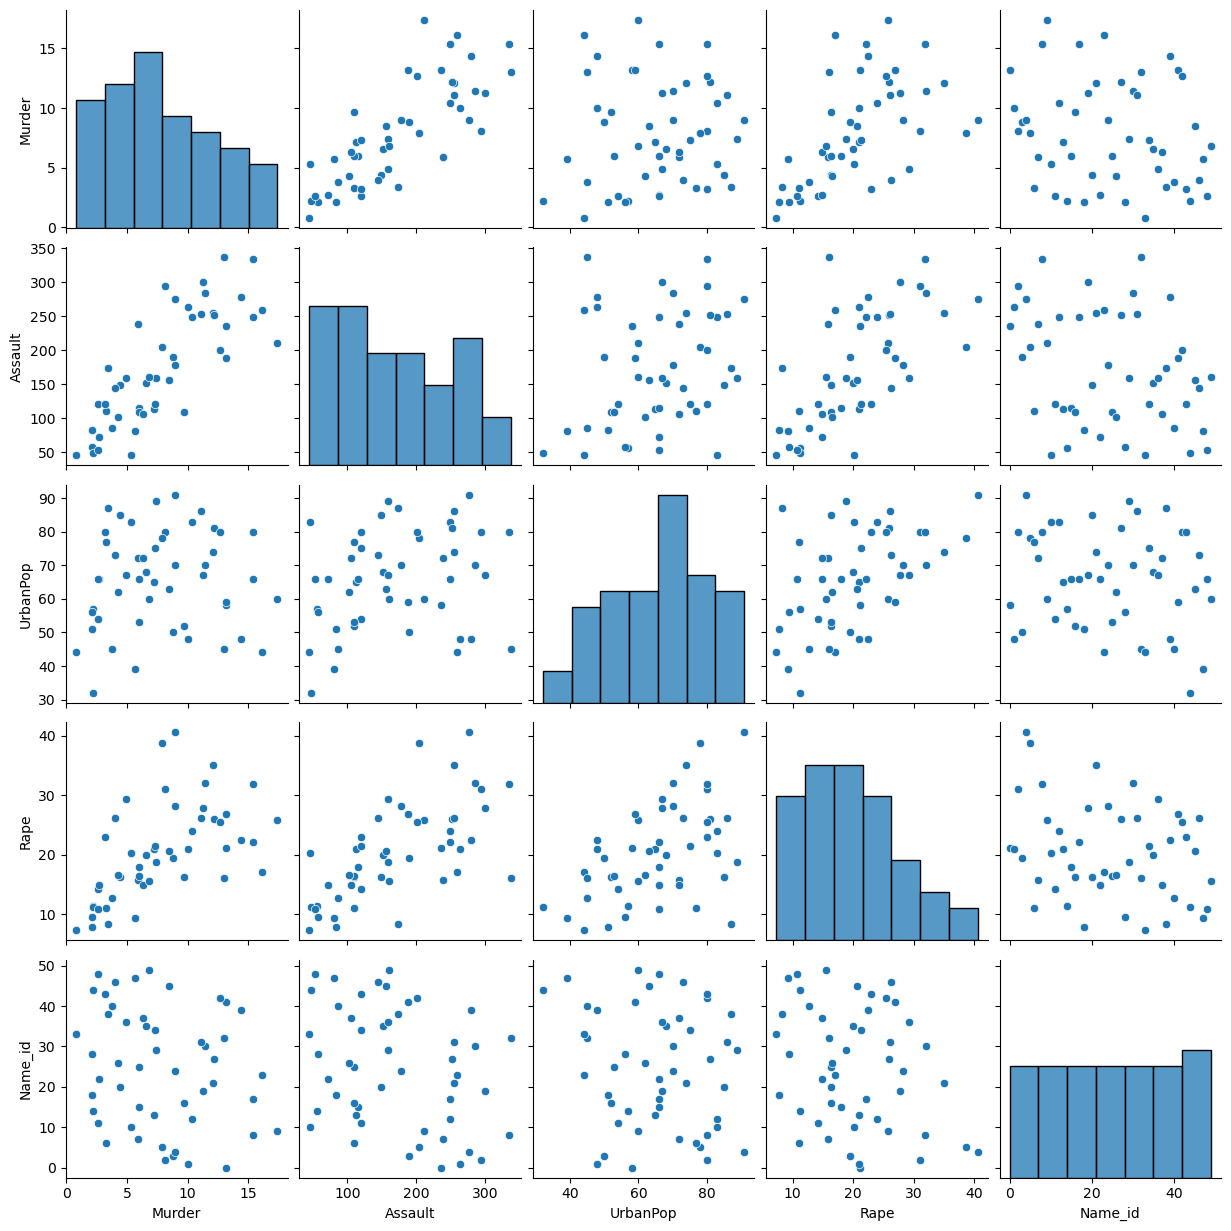

In [16]:
import seaborn as sns
sns.pairplot(data_vis, palette=sns.color_palette("tab10"),  )


 WCSS (finding optimum number of clusters) 
  
 A.) for standardized data 
 


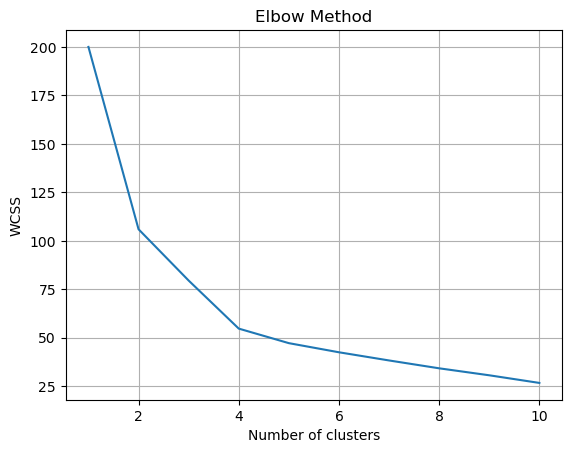

In [19]:
print(' WCSS (finding optimum number of clusters) \n  \n A.) for standardized data \n ')
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_s.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

B.) for normalised data


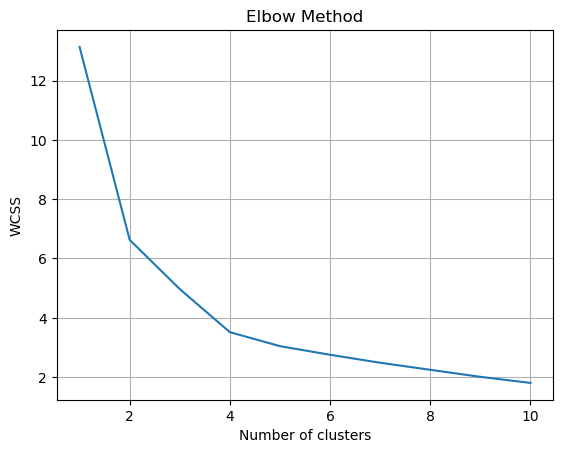

In [20]:
print('B.) for normalised data')
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(data_n.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [22]:
print(' Building cluster (K-means square)')
from sklearn.cluster import KMeans
model = KMeans(4, random_state=42)
model.fit(data_s.iloc[:,1:])

 Building cluster (K-means square)


KMeans(n_clusters=4, random_state=42)

In [23]:
model.labels_

array([1, 1, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

In [24]:
#Assign clusters to the data_s set
data_s['cluster_id'] = model.labels_
data_s.head()

,Name,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,1.255179,0.790787,-0.526195,0.105935,1
1,Alaska,0.513019,1.118060,-1.224067,0.080652,1
2,Arizona,0.072361,1.493817,1.009122,1.344791,3
3,Arkansas,0.234708,0.233212,-1.084492,-0.108969,1
4,California,0.281093,1.275635,1.776781,2.558365,3


In [25]:
data_s.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,-0.971303,-1.117836,-0.939550,-1.034708
1,1,1.324757,0.909306,-0.867377,0.127004
2,2,-0.494407,-0.386484,0.581676,-0.199829
3,3,0.717886,1.044322,0.892810,1.292119


In [26]:
model.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -1.03470758],
       [ 1.32475684,  0.90930557, -0.86737678,  0.12700384],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.19982879],
       [ 0.71788585,  1.04432228,  0.89281033,  1.29211872]])

In [27]:
#Assign clusters to the data set
data['cluster_id'] = model.labels_
data.head()

,Murder,Assault,UrbanPop,Rape,Name_id,cluster_id
0,13.2,236,58,21.2,0,1
1,10.0,263,48,21.0,1,1
2,8.1,294,80,31.0,2,3
3,8.8,190,50,19.5,3,1
4,9.0,276,91,40.6,4,3


cluster visualisation


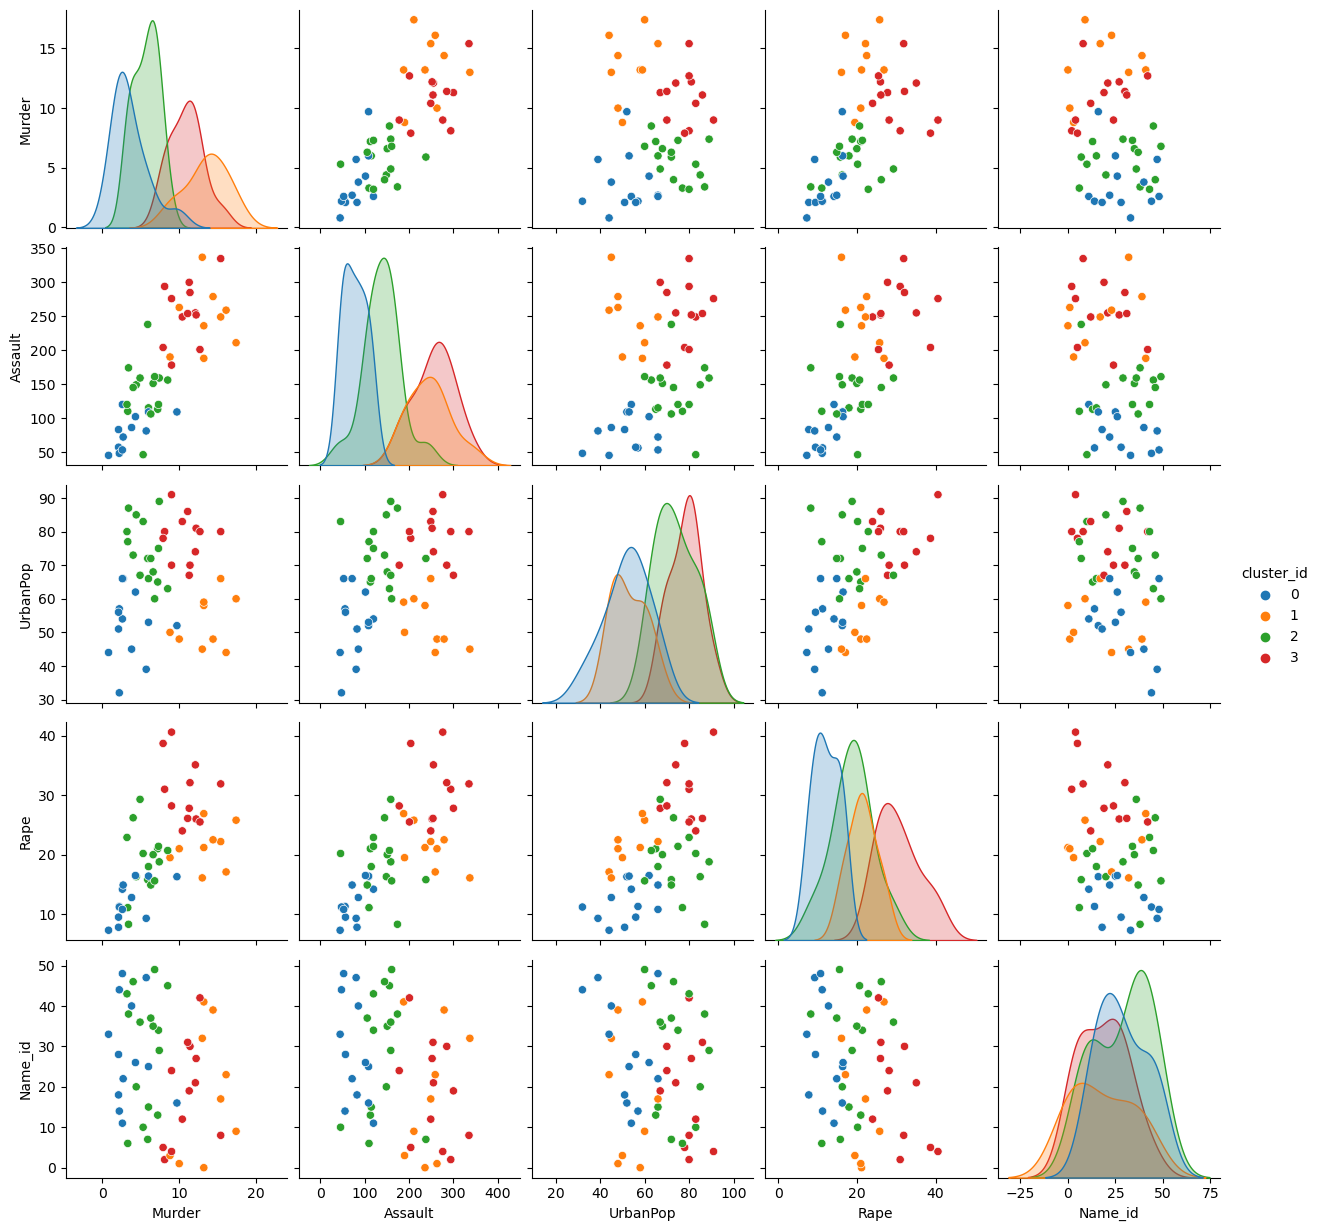

In [28]:
print('cluster visualisation')
import seaborn as sns
sns.pairplot(data, palette=sns.color_palette("tab10")[:4], hue = 'cluster_id')

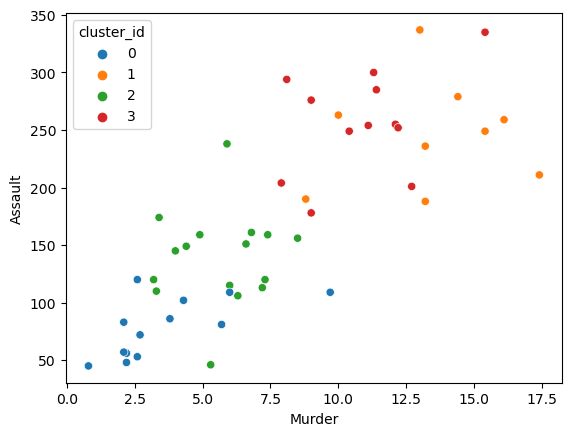

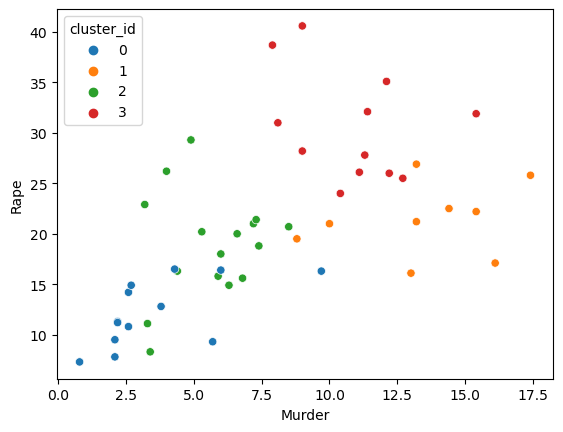

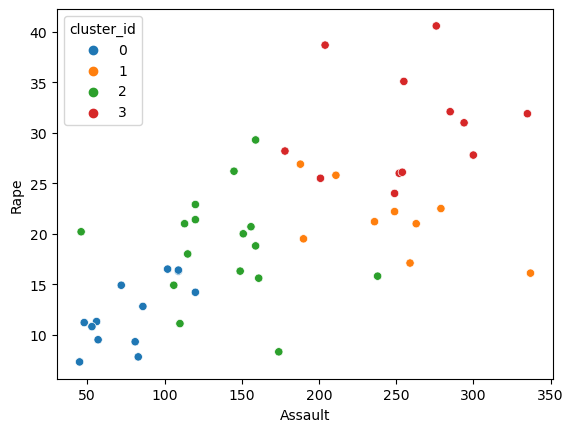

In [29]:
import seaborn as sns
sns.scatterplot(x='Murder', y='Assault', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])                 
plt.show()
sns.scatterplot(x='Murder', y='Rape', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='Assault', y='Rape', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])              
plt.show()

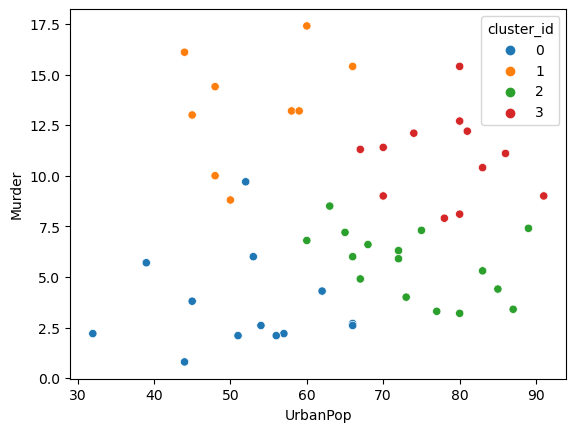

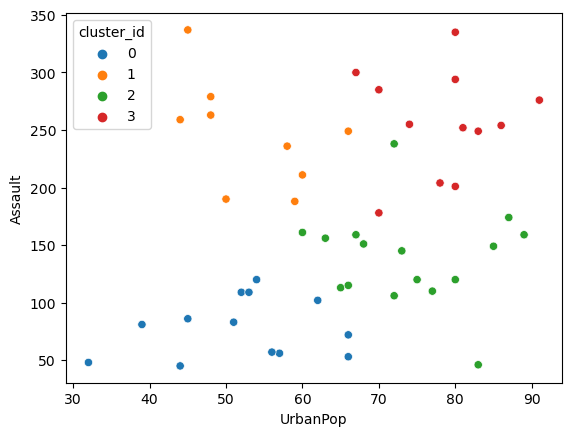

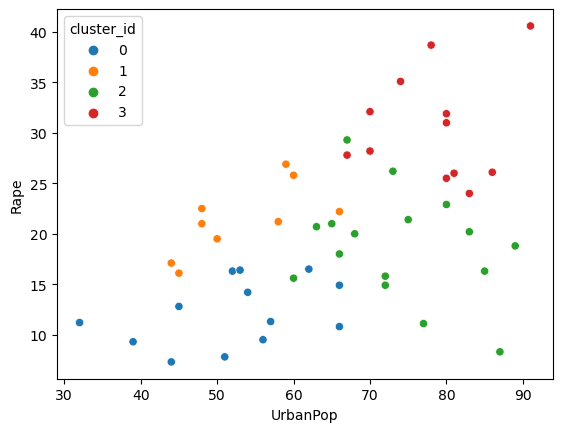

In [30]:
import seaborn as sns
sns.scatterplot(x='UrbanPop', y='Murder', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])                 
plt.show()
sns.scatterplot(x='UrbanPop', y='Assault', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='UrbanPop', y='Rape', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])              
plt.show()